In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv", header =0, parse_dates=["month"])

In [3]:
df["year_of_sales"] = df["month"].dt.year
df["month_of_sales"] = df["month"].dt.month

In [4]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'year_of_sales', 'month_of_sales'],
      dtype='object')

In [5]:
# Desired column order
new_col_order = ['month', 'year_of_sales', 'month_of_sales', 'town', 'flat_type', 'block', 
                 'street_name', 'storey_range','floor_area_sqm', 'flat_model', 'lease_commence_date',
                 'remaining_lease', 'resale_price']

In [6]:
# Reorder the columns
df = df[new_col_order]

In [7]:
# Convert 'floor_area_sqm' to integer
df['floor_area_sqm'] = df['floor_area_sqm'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202946 entries, 0 to 202945
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                202946 non-null  datetime64[ns]
 1   year_of_sales        202946 non-null  int64         
 2   month_of_sales       202946 non-null  int64         
 3   town                 202946 non-null  object        
 4   flat_type            202946 non-null  object        
 5   block                202946 non-null  object        
 6   street_name          202946 non-null  object        
 7   storey_range         202946 non-null  object        
 8   floor_area_sqm       202946 non-null  int64         
 9   flat_model           202946 non-null  object        
 10  lease_commence_date  202946 non-null  int64         
 11  remaining_lease      202946 non-null  object        
 12  resale_price         202946 non-null  float64       
dtypes: datetime64[

In [9]:
df[df["town"] == "punggol"]

Empty DataFrame
Columns: [month, year_of_sales, month_of_sales, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_commence_date, remaining_lease, resale_price]
Index: []

In [10]:
df_punggol = df[df["town"] == "PUNGGOL"]

In [11]:
df_punggol_sorted = df_punggol.sort_values(by="resale_price", ascending=False)

In [12]:
df_punggol_sorted

month  year_of_sales  month_of_sales     town flat_type block  \
185751 2024-07-01           2024               7  PUNGGOL    5 ROOM  269A   
185766 2024-08-01           2024               8  PUNGGOL    5 ROOM  267B   
157053 2023-01-01           2023               1  PUNGGOL    5 ROOM  268B   
132215 2022-09-01           2022               9  PUNGGOL    5 ROOM  268C   
158449 2023-09-01           2023               9  PUNGGOL    5 ROOM  270C   
...           ...            ...             ...      ...       ...   ...   
74304  2020-07-01           2020               7  PUNGGOL    2 ROOM  672A   
63384  2019-12-01           2019              12  PUNGGOL    2 ROOM  209C   
74314  2020-07-01           2020               7  PUNGGOL    2 ROOM  210C   
61451  2019-11-01           2019              11  PUNGGOL    2 ROOM  623B   
51562  2019-06-01           2019               6  PUNGGOL    2 ROOM  602B   

             street_name storey_range  floor_area_sqm              flat_model  \
185751     PUNGGOL FIELD     16 TO 18             149  Premium Apartment Loft   
185766     PUNGGOL FIELD     16 TO 18             149  Premium Apartment Loft   
157053     PUNGGOL FIELD     16 TO 18             149  Premium Apartment Loft   
132215     PUNGGOL FIELD     16 TO 18             149  Premium Apartment Loft   
158449     PUNGGOL FIELD     16 TO 18             149  Premium Apartment Loft   
...                  ...          ...             ...                     ...   
74304   EDGEFIELD PLAINS     10 TO 12              44                 Model A   
63384         PUNGGOL PL     01 TO 03              46                 Model A   
74314         PUNGGOL PL     13 TO 15              46                 Model A   
61451       PUNGGOL CTRL     01 TO 03              46                 Model A   
51562       PUNGGOL CTRL     04 TO 06              50                 Model A   

        lease_commence_date     remaining_lease  resale_price  
185751                 2013  87 years 08 months     1228000.0  
185766                 2013  87 years 06 months     1223880.0  
157053                 2013   89 years 01 month     1220000.0  
132215                 2013  89 years 05 months     1198000.0  
158449                 2013  88 years 04 months     1150000.0  
...                     ...                 ...           ...  
74304                  2015  94 years 06 months      230000.0  
63384                  2014   94 years 01 month      230000.0  
74314                  2014  93 years 05 months      230000.0  
61451                  2014  93 years 06 months      230000.0  
51562                  2012   92 years 01 month      225000.0  

[14945 rows x 13 columns]

<AxesSubplot:xlabel='resale_price', ylabel='Count'>

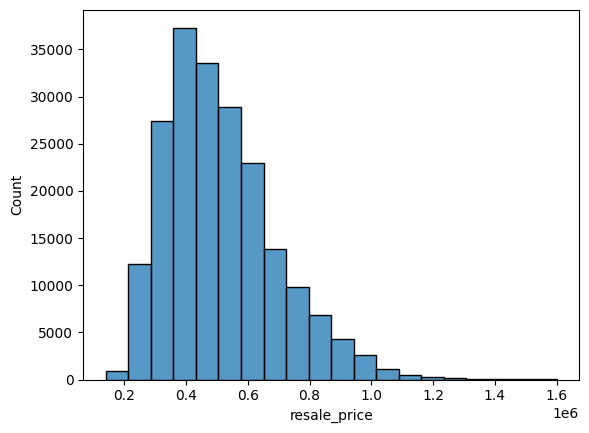

In [13]:
sns.histplot(data=df.resale_price, bins=20)

In [14]:
df.groupby("town").mean()[["resale_price"]].sort_values(by="resale_price", ascending=False)

resale_price
town                          
BUKIT TIMAH      756560.639760
BISHAN           694423.326845
CENTRAL AREA     675481.046608
BUKIT MERAH      624191.268181
QUEENSTOWN       623908.339824
KALLANG/WHAMPOA  576945.043147
PASIR RIS        569662.328125
SERANGOON        550963.898788
MARINE PARADE    549979.347137
TOA PAYOH        545358.887613
TAMPINES         544471.807953
CLEMENTI         540765.619934
PUNGGOL          530315.521162
SENGKANG         513163.309098
HOUGANG          507578.492942
GEYLANG          495339.125630
BUKIT PANJANG    489630.715777
BUKIT BATOK      486244.747544
SEMBAWANG        481735.954665
CHOA CHU KANG    477589.137702
BEDOK            468847.590935
ANG MO KIO       467014.300067
WOODLANDS        465397.111844
JURONG EAST      463586.244144
JURONG WEST      451703.766484
YISHUN           438401.039112

In [15]:
df.groupby("town").count()[["month"]].sort_values(by="month", ascending=False)


month
town                  
SENGKANG         16712
PUNGGOL          14945
WOODLANDS        14424
YISHUN           13826
TAMPINES         13705
JURONG WEST      13454
BEDOK            10634
HOUGANG          10199
CHOA CHU KANG     9246
ANG MO KIO        8344
BUKIT BATOK       8241
BUKIT MERAH       7777
BUKIT PANJANG     7351
TOA PAYOH         6373
KALLANG/WHAMPOA   6177
PASIR RIS         5888
SEMBAWANG         5848
QUEENSTOWN        5561
GEYLANG           5005
CLEMENTI          4515
JURONG EAST       4141
SERANGOON         3647
BISHAN            3582
CENTRAL AREA      1604
MARINE PARADE     1247
BUKIT TIMAH        500

In [16]:
df.groupby("town").count()


month  year_of_sales  month_of_sales  flat_type  block  \
town                                                                      
ANG MO KIO        8344           8344            8344       8344   8344   
BEDOK            10634          10634           10634      10634  10634   
BISHAN            3582           3582            3582       3582   3582   
BUKIT BATOK       8241           8241            8241       8241   8241   
BUKIT MERAH       7777           7777            7777       7777   7777   
BUKIT PANJANG     7351           7351            7351       7351   7351   
BUKIT TIMAH        500            500             500        500    500   
CENTRAL AREA      1604           1604            1604       1604   1604   
CHOA CHU KANG     9246           9246            9246       9246   9246   
CLEMENTI          4515           4515            4515       4515   4515   
GEYLANG           5005           5005            5005       5005   5005   
HOUGANG          10199          10199           10199      10199  10199   
JURONG EAST       4141           4141            4141       4141   4141   
JURONG WEST      13454          13454           13454      13454  13454   
KALLANG/WHAMPOA   6177           6177            6177       6177   6177   
MARINE PARADE     1247           1247            1247       1247   1247   
PASIR RIS         5888           5888            5888       5888   5888   
PUNGGOL          14945          14945           14945      14945  14945   
QUEENSTOWN        5561           5561            5561       5561   5561   
SEMBAWANG         5848           5848            5848       5848   5848   
SENGKANG         16712          16712           16712      16712  16712   
SERANGOON         3647           3647            3647       3647   3647   
TAMPINES         13705          13705           13705      13705  13705   
TOA PAYOH         6373           6373            6373       6373   6373   
WOODLANDS        14424          14424           14424      14424  14424   
YISHUN           13826          13826           13826      13826  13826   

                 street_name  storey_range  floor_area_sqm  flat_model  \
town                                                                     
ANG MO KIO              8344          8344            8344        8344   
BEDOK                  10634         10634           10634       10634   
BISHAN                  3582          3582            3582        3582   
BUKIT BATOK             8241          8241            8241        8241   
BUKIT MERAH             7777          7777            7777        7777   
BUKIT PANJANG           7351          7351            7351        7351   
BUKIT TIMAH              500           500             500         500   
CENTRAL AREA            1604          1604            1604        1604   
CHOA CHU KANG           9246          9246            9246        9246   
CLEMENTI                4515          4515            4515        4515   
GEYLANG                 5005          5005            5005        5005   
HOUGANG                10199         10199           10199       10199   
JURONG EAST             4141          4141            4141        4141   
JURONG WEST            13454         13454           13454       13454   
KALLANG/WHAMPOA         6177          6177            6177        6177   
MARINE PARADE           1247          1247            1247        1247   
PASIR RIS               5888          5888            5888        5888   
PUNGGOL                14945         14945           14945       14945   
QUEENSTOWN              5561          5561            5561        5561   
SEMBAWANG               5848          5848            5848        5848   
SENGKANG               16712         16712           16712       16712   
SERANGOON               3647          3647            3647        3647   
TAMPINES               13705         13705           13705       13705   
TOA PAYOH               6373          6373            6373        

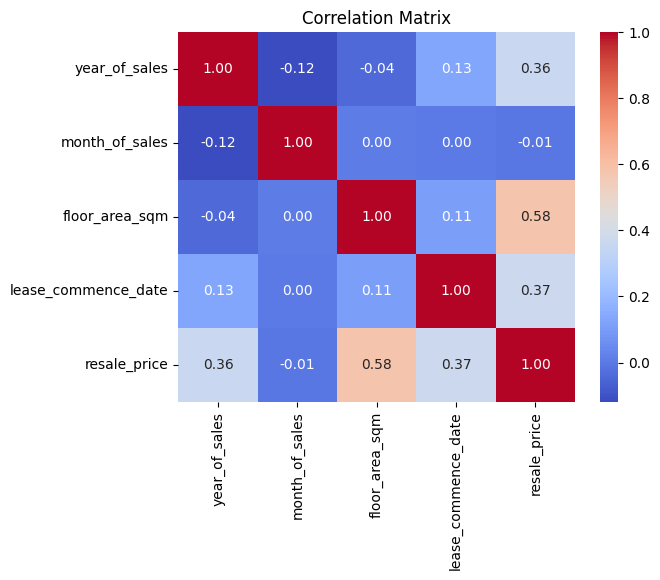

In [17]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Optional: Add a title
plt.title("Correlation Matrix")

# Display the plot
plt.show()

<AxesSubplot:xlabel='lease_commence_date', ylabel='Count'>

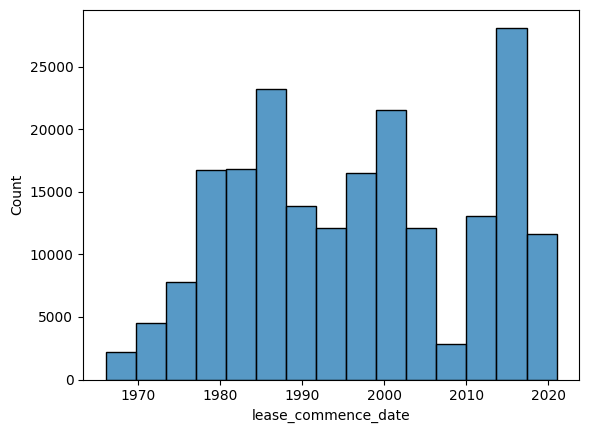

In [18]:
sns.histplot(data=df.lease_commence_date, bins=15)

In [19]:
df.head()


month  year_of_sales  month_of_sales        town flat_type block  \
0 2017-01-01           2017               1  ANG MO KIO    2 ROOM   406   
1 2017-01-01           2017               1  ANG MO KIO    3 ROOM   108   
2 2017-01-01           2017               1  ANG MO KIO    3 ROOM   602   
3 2017-01-01           2017               1  ANG MO KIO    3 ROOM   465   
4 2017-01-01           2017               1  ANG MO KIO    3 ROOM   601   

         street_name storey_range  floor_area_sqm      flat_model  \
0  ANG MO KIO AVE 10     10 TO 12              44        Improved   
1   ANG MO KIO AVE 4     01 TO 03              67  New Generation   
2   ANG MO KIO AVE 5     01 TO 03              67  New Generation   
3  ANG MO KIO AVE 10     04 TO 06              68  New Generation   
4   ANG MO KIO AVE 5     01 TO 03              67  New Generation   

   lease_commence_date     remaining_lease  resale_price  
0                 1979  61 years 04 months      232000.0  
1                 1978  60 years 07 months      250000.0  
2                 1980  62 years 05 months      262000.0  
3                 1980   62 years 01 month      265000.0  
4                 1980  62 years 05 months      265000.0

In [20]:
df_filtered_1=df[(df["town"] == "PUNGGOL") & (df["flat_type"]== "4 ROOM")]
df_filtered_1.head()

month  year_of_sales  month_of_sales     town flat_type block  \
708 2017-01-01           2017               1  PUNGGOL    4 ROOM  203B   
709 2017-01-01           2017               1  PUNGGOL    4 ROOM   132   
710 2017-01-01           2017               1  PUNGGOL    4 ROOM  128A   
711 2017-01-01           2017               1  PUNGGOL    4 ROOM  106B   
712 2017-01-01           2017               1  PUNGGOL    4 ROOM  614A   

            street_name storey_range  floor_area_sqm         flat_model  \
708       PUNGGOL FIELD     10 TO 12              85            Model A   
709     EDGEDALE PLAINS     07 TO 09              91  Premium Apartment   
710  PUNGGOL FIELD WALK     07 TO 09              91            Model A   
711       PUNGGOL FIELD     13 TO 15              90            Model A   
712    EDGEFIELD PLAINS     01 TO 03              92            Model A   

     lease_commence_date     remaining_lease  resale_price  
708                 2004  86 years 10 months      350000.0  
709                 2003  85 years 10 months      370000.0  
710                 2003  85 years 07 months      370000.0  
711                 2003   85 years 01 month      380000.0  
712                 2012            95 years      408000.0

Text(0.5, 1.0, 'Punggol 4 Room Price VS month')

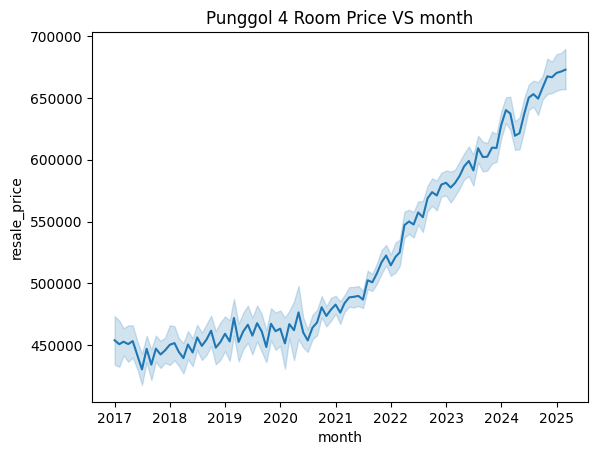

In [21]:
sns.lineplot(data= df_filtered_1, x="month", y="resale_price")
plt.title("Punggol 4 Room Price VS month")

In [22]:
df_filtered_2=df[(df["town"] == "SENGKANG") & (df["flat_type"]== "4 ROOM")]
df_filtered_2.head()

month  year_of_sales  month_of_sales      town flat_type block  \
822 2017-01-01           2017               1  SENGKANG    4 ROOM  308C   
823 2017-01-01           2017               1  SENGKANG    4 ROOM  124B   
824 2017-01-01           2017               1  SENGKANG    4 ROOM  185C   
825 2017-01-01           2017               1  SENGKANG    4 ROOM  184C   
826 2017-01-01           2017               1  SENGKANG    4 ROOM  324D   

           street_name storey_range  floor_area_sqm flat_model  \
822      ANCHORVALE RD     01 TO 03              90    Model A   
823       RIVERVALE DR     01 TO 03              90   Model A2   
824     RIVERVALE CRES     13 TO 15              85   Model A2   
825     RIVERVALE CRES     10 TO 12              85   Model A2   
826  SENGKANG EAST WAY     01 TO 03              90    Model A   

     lease_commence_date     remaining_lease  resale_price  
822                 2002  84 years 02 months      312000.0  
823                 1999  81 years 06 months      325000.0  
824                 2000  82 years 11 months      330000.0  
825                 2003  85 years 05 months      332000.0  
826                 2003  85 years 02 months      338000.0

Text(0.5, 1.0, 'Sengkang 4 Room Price VS month')

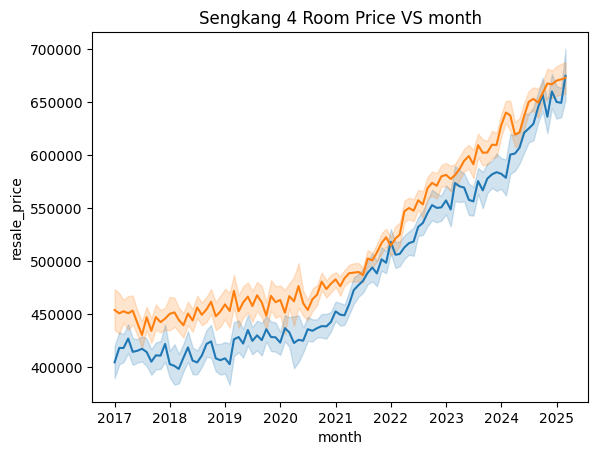

In [23]:
sns.lineplot(data= df_filtered_2, x="month", y="resale_price")
sns.lineplot(data= df_filtered_1, x="month", y="resale_price")
plt.title("Sengkang 4 Room Price VS month")

In [24]:
df_filtered_1=df[(df["town"] == "PUNGGOL") & (df["flat_type"]== "4 ROOM")]
df_filtered_2=df[(df["town"] == "SENGKANG") & (df["flat_type"]== "4 ROOM")]
df_filtered_3=df[(df["town"] == "WOODLANDS") & (df["flat_type"]== "4 ROOM")]
df_filtered_4=df[(df["town"] == "YISHUN") & (df["flat_type"]== "4 ROOM")]
df_filtered_5=df[(df["town"] == "TAMPINES") & (df["flat_type"]== "4 ROOM")]

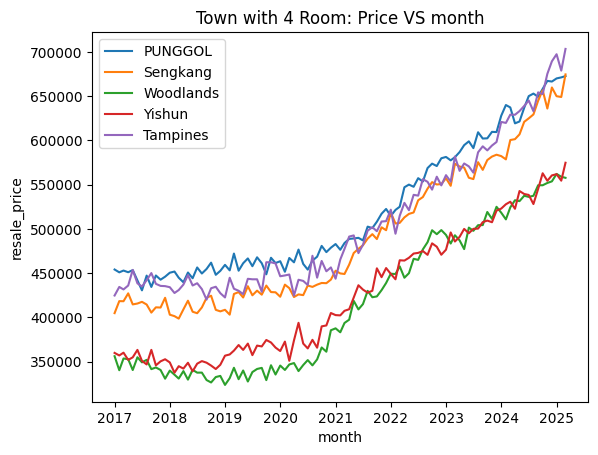

In [25]:
sns.lineplot(data= df_filtered_1, x="month", y="resale_price", ci=None, label="PUNGGOL")
sns.lineplot(data= df_filtered_2, x="month", y="resale_price", ci=None, label="Sengkang")
sns.lineplot(data= df_filtered_3, x="month", y="resale_price", ci=None, label="Woodlands")
sns.lineplot(data= df_filtered_4, x="month", y="resale_price", ci=None, label="Yishun")
sns.lineplot(data= df_filtered_5, x="month", y="resale_price", ci=None, label="Tampines")
plt.title("Town with 4 Room: Price VS month")
plt.legend()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202946 entries, 0 to 202945
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                202946 non-null  datetime64[ns]
 1   year_of_sales        202946 non-null  int64         
 2   month_of_sales       202946 non-null  int64         
 3   town                 202946 non-null  object        
 4   flat_type            202946 non-null  object        
 5   block                202946 non-null  object        
 6   street_name          202946 non-null  object        
 7   storey_range         202946 non-null  object        
 8   floor_area_sqm       202946 non-null  int64         
 9   flat_model           202946 non-null  object        
 10  lease_commence_date  202946 non-null  int64         
 11  remaining_lease      202946 non-null  object        
 12  resale_price         202946 non-null  float64       
dtypes: datetime64[

In [27]:
df

month  year_of_sales  month_of_sales        town  flat_type block  \
0      2017-01-01           2017               1  ANG MO KIO     2 ROOM   406   
1      2017-01-01           2017               1  ANG MO KIO     3 ROOM   108   
2      2017-01-01           2017               1  ANG MO KIO     3 ROOM   602   
3      2017-01-01           2017               1  ANG MO KIO     3 ROOM   465   
4      2017-01-01           2017               1  ANG MO KIO     3 ROOM   601   
...           ...            ...             ...         ...        ...   ...   
202941 2025-03-01           2025               3      YISHUN  EXECUTIVE  633A   
202942 2025-02-01           2025               2      YISHUN  EXECUTIVE   723   
202943 2025-01-01           2025               1      YISHUN  EXECUTIVE   836   
202944 2025-02-01           2025               2      YISHUN  EXECUTIVE   824   
202945 2025-02-01           2025               2      YISHUN  EXECUTIVE   826   

              street_name storey_range  floor_area_sqm      flat_model  \
0       ANG MO KIO AVE 10     10 TO 12              44        Improved   
1        ANG MO KIO AVE 4     01 TO 03              67  New Generation   
2        ANG MO KIO AVE 5     01 TO 03              67  New Generation   
3       ANG MO KIO AVE 10     04 TO 06              68  New Generation   
4        ANG MO KIO AVE 5     01 TO 03              67  New Generation   
...                   ...          ...             ...             ...   
202941       YISHUN ST 61     01 TO 03             159       Apartment   
202942       YISHUN ST 71     07 TO 09             146      Maisonette   
202943       YISHUN ST 81     01 TO 03             146      Maisonette   
202944       YISHUN ST 81     01 TO 03             145       Apartment   
202945       YISHUN ST 81     10 TO 12             146      Maisonette   

        lease_commence_date     remaining_lease  resale_price  
0                      1979  61 years 04 months      232000.0  
1                      1978  60 years 07 months      250000.0  
2                      1980  62 years 05 months      262000.0  
3                      1980   62 years 01 month      265000.0  
4                      1980  62 years 05 months      265000.0  
...                     ...                 ...           ...  
202941                 1992  66 years 04 months      978888.0  
202942                 1986  60 years 05 months      818888.0  
202943                 1988  62 years 02 months      960000.0  
202944                 1987  61 years 10 months      868888.0  
202945                 1988            62 years     1100888.0  

[202946 rows x 13 columns]

In [28]:
sns.set()
import matplotlib.pyplot as plt

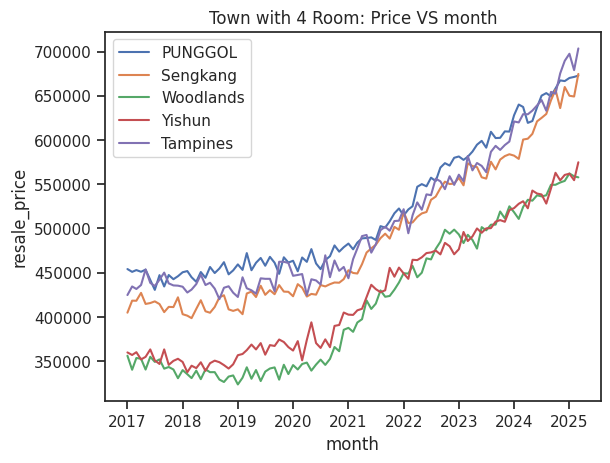

In [29]:
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

sns.lineplot(data= df_filtered_1, x="month", y="resale_price", ci=None, label="PUNGGOL")
sns.lineplot(data= df_filtered_2, x="month", y="resale_price", ci=None, label="Sengkang")
sns.lineplot(data= df_filtered_3, x="month", y="resale_price", ci=None, label="Woodlands")
sns.lineplot(data= df_filtered_4, x="month", y="resale_price", ci=None, label="Yishun")
sns.lineplot(data= df_filtered_5, x="month", y="resale_price", ci=None, label="Tampines")
plt.title("Town with 4 Room: Price VS month")
plt.legend()
plt.show()

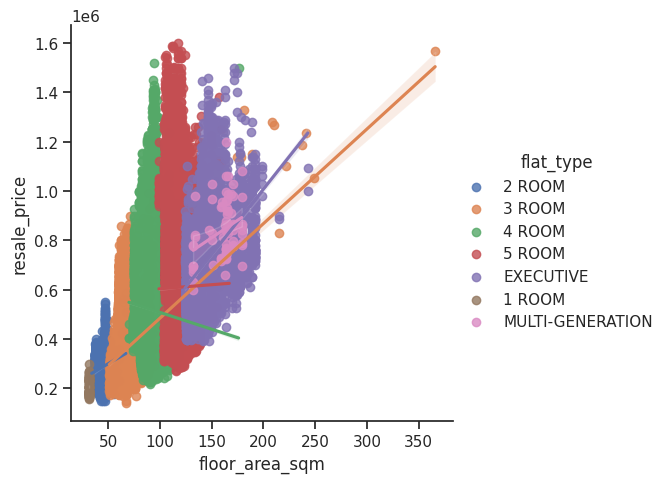

In [30]:
sns.lmplot(data=df, x="floor_area_sqm", y="resale_price", hue="flat_type")

<AxesSubplot:xlabel='floor_area_sqm', ylabel='resale_price'>

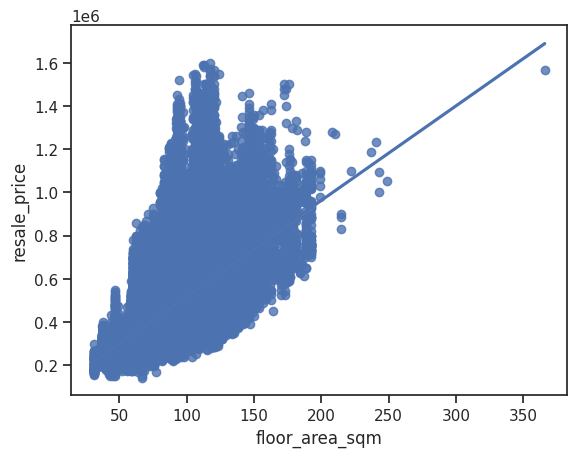

In [31]:
sns.regplot(data=df, x="floor_area_sqm", y="resale_price")

In [32]:
def plot():
    
    sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    sns.lineplot(data= df_filtered_1, x="month", y="resale_price", ci=None, label="PUNGGOL")
    sns.lineplot(data= df_filtered_2, x="month", y="resale_price", ci=None, label="Sengkang")
    sns.lineplot(data= df_filtered_3, x="month", y="resale_price", ci=None, label="Woodlands")
    sns.lineplot(data= df_filtered_4, x="month", y="resale_price", ci=None, label="Yishun")
    sns.lineplot(data= df_filtered_5, x="month", y="resale_price", ci=None, label="Tampines")
    plt.title("Town with 4 Room: Price VS month")
    plt.xticks(rotation=90)
    plt.legend()

<Figure size 640x480 with 0 Axes>

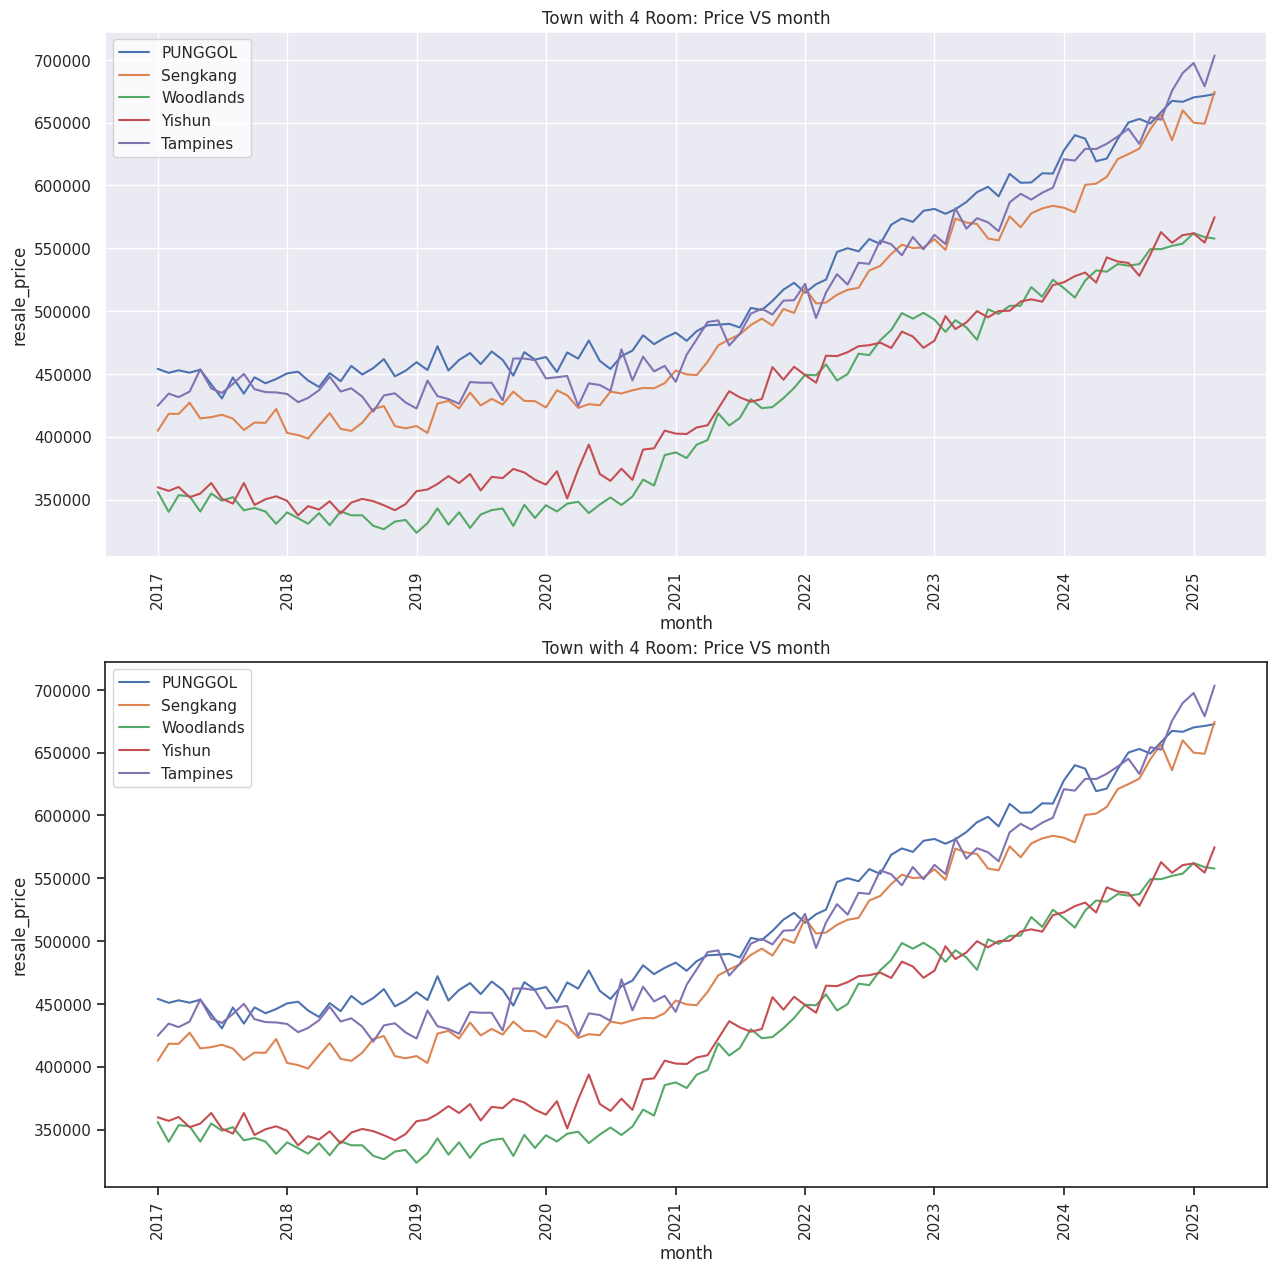

In [33]:
plt.clf()
plt.figure(figsize=(15, 15))
with sns.axes_style('darkgrid'):
    plt.subplot(211)
    plot()

plt.subplot(212)

plot()

In [34]:
df.head()

month  year_of_sales  month_of_sales        town flat_type block  \
0 2017-01-01           2017               1  ANG MO KIO    2 ROOM   406   
1 2017-01-01           2017               1  ANG MO KIO    3 ROOM   108   
2 2017-01-01           2017               1  ANG MO KIO    3 ROOM   602   
3 2017-01-01           2017               1  ANG MO KIO    3 ROOM   465   
4 2017-01-01           2017               1  ANG MO KIO    3 ROOM   601   

         street_name storey_range  floor_area_sqm      flat_model  \
0  ANG MO KIO AVE 10     10 TO 12              44        Improved   
1   ANG MO KIO AVE 4     01 TO 03              67  New Generation   
2   ANG MO KIO AVE 5     01 TO 03              67  New Generation   
3  ANG MO KIO AVE 10     04 TO 06              68  New Generation   
4   ANG MO KIO AVE 5     01 TO 03              67  New Generation   

   lease_commence_date     remaining_lease  resale_price  
0                 1979  61 years 04 months      232000.0  
1                 1978  60 years 07 months      250000.0  
2                 1980  62 years 05 months      262000.0  
3                 1980   62 years 01 month      265000.0  
4                 1980  62 years 05 months      265000.0

In [35]:
df.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [36]:
df.flat_type.unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [37]:
df.storey_range.unique()

array(['10 TO 12', '01 TO 03', '04 TO 06', '07 TO 09', '13 TO 15',
       '19 TO 21', '22 TO 24', '16 TO 18', '34 TO 36', '28 TO 30',
       '37 TO 39', '49 TO 51', '25 TO 27', '40 TO 42', '31 TO 33',
       '46 TO 48', '43 TO 45'], dtype=object)

In [38]:
df.flat_model.unique()

array(['Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment',
       'Simplified', 'Model A', 'Premium Apartment', 'Adjoined flat',
       'Model A-Maisonette', 'Maisonette', 'Type S1', 'Type S2',
       'Model A2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette',
       'Multi Generation', 'Premium Apartment Loft', '2-room', '3Gen'],
      dtype=object)

In [39]:
def plot_price_vs_sqm():
    sns.set_style("whitegrid")
    sns.set_palette("bright")
    hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.relplot(data=df, x="floor_area_sqm", y="resale_price", col="town", col_wrap=3, hue="flat_type", hue_order=hue_order)
    g.fig.suptitle("Resale Price VS Floor Area across different town", y=1.01)

<Figure size 640x480 with 0 Axes>

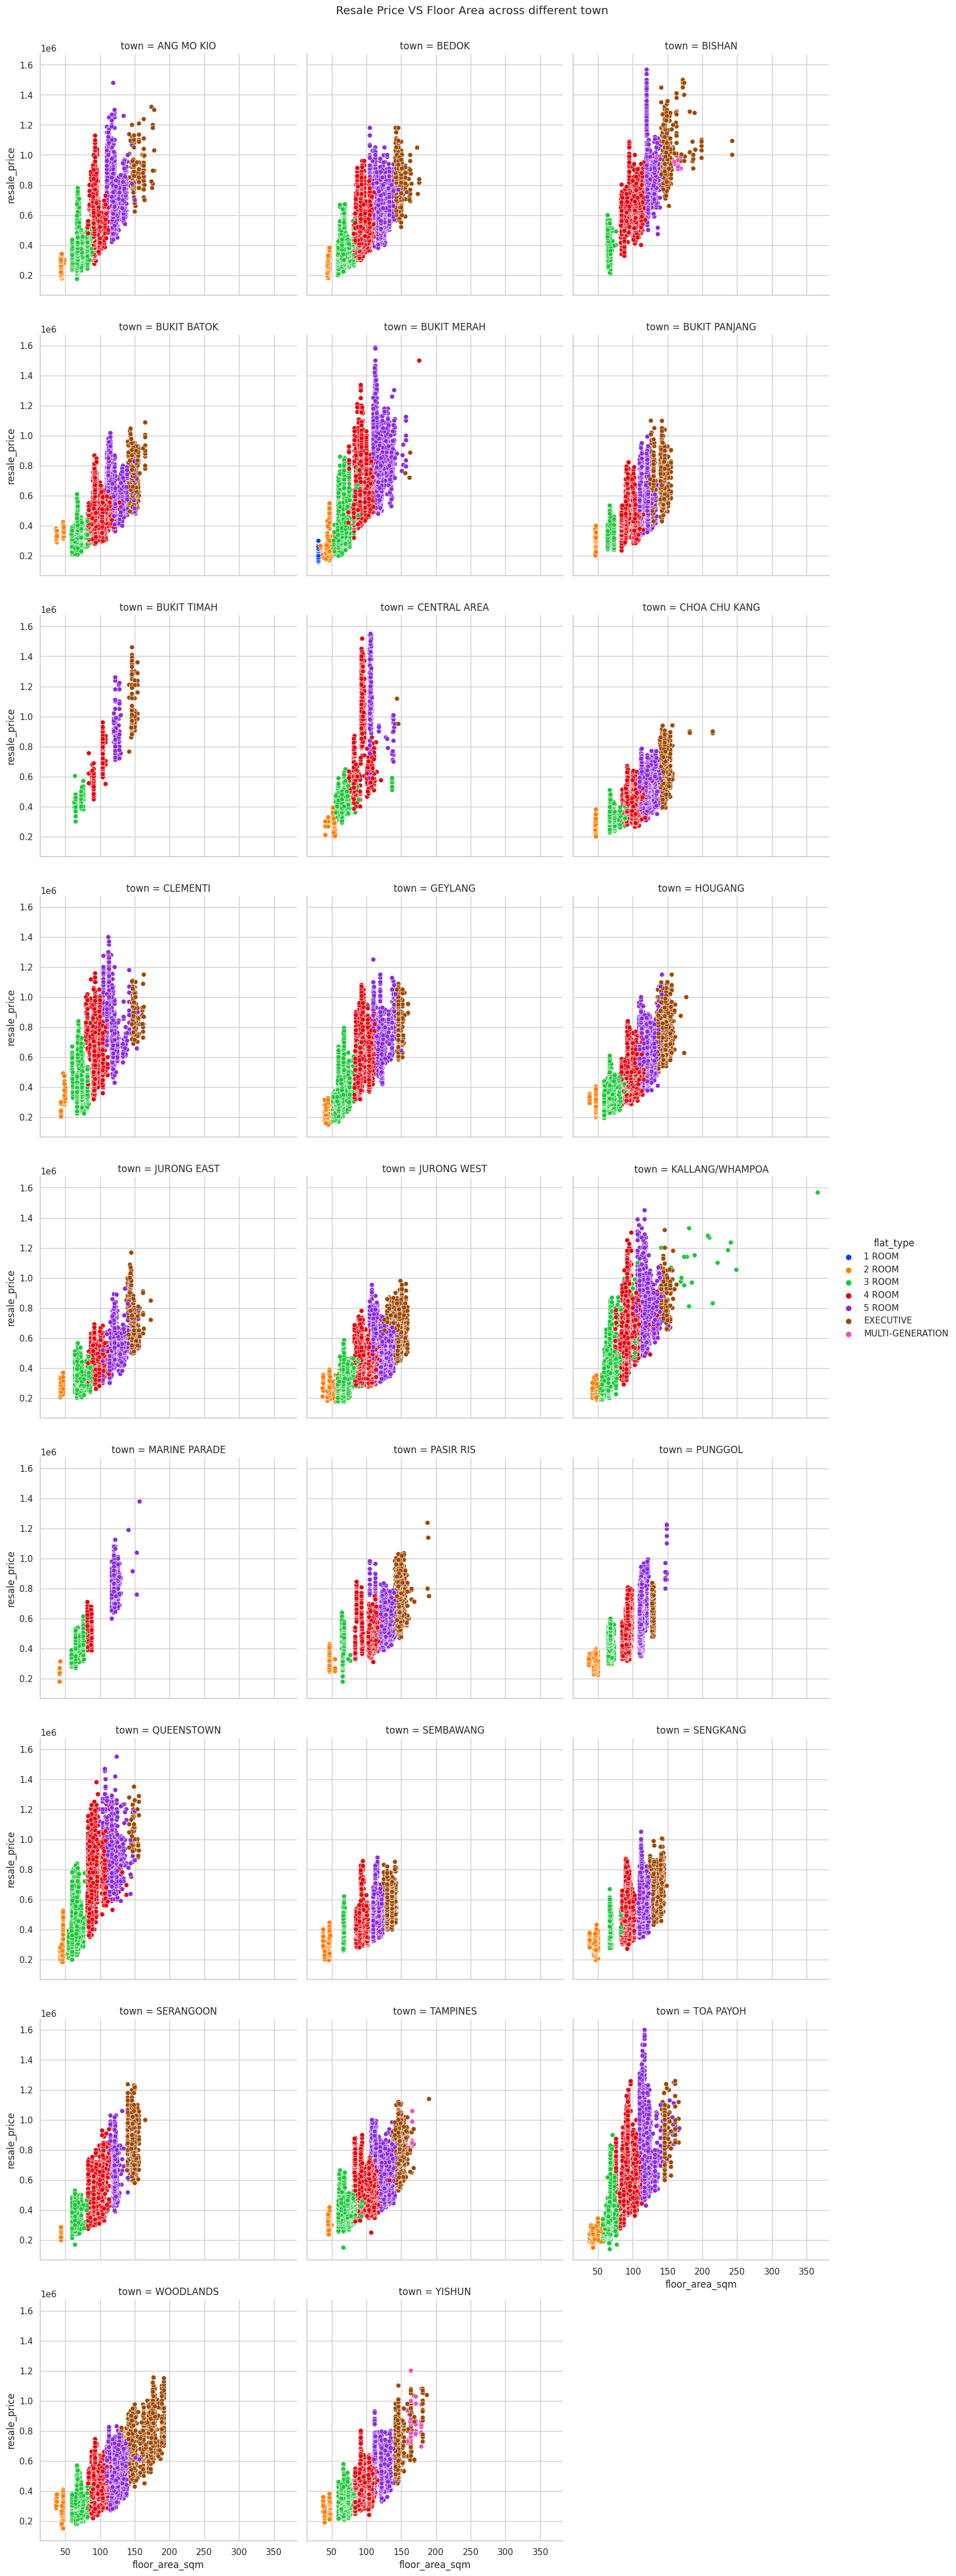

In [40]:
plt.clf()
plot_price_vs_sqm()
plt.show()

In [41]:
def plot_box():
    plt.clf()
    sns.set_style("whitegrid")
    sns.set_palette("bright")
    row_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.catplot(data=df, x="town", y="resale_price", row="flat_type", row_order=row_order, kind="box",height=2.5, aspect=5, palette="bright")
    g.fig.suptitle("Resale Price VS Flat Type across different town", y=1.01)   
    g.set(ylim=(0, 1_600_000))
    plt.xticks(rotation=90)

<Figure size 640x480 with 0 Axes>

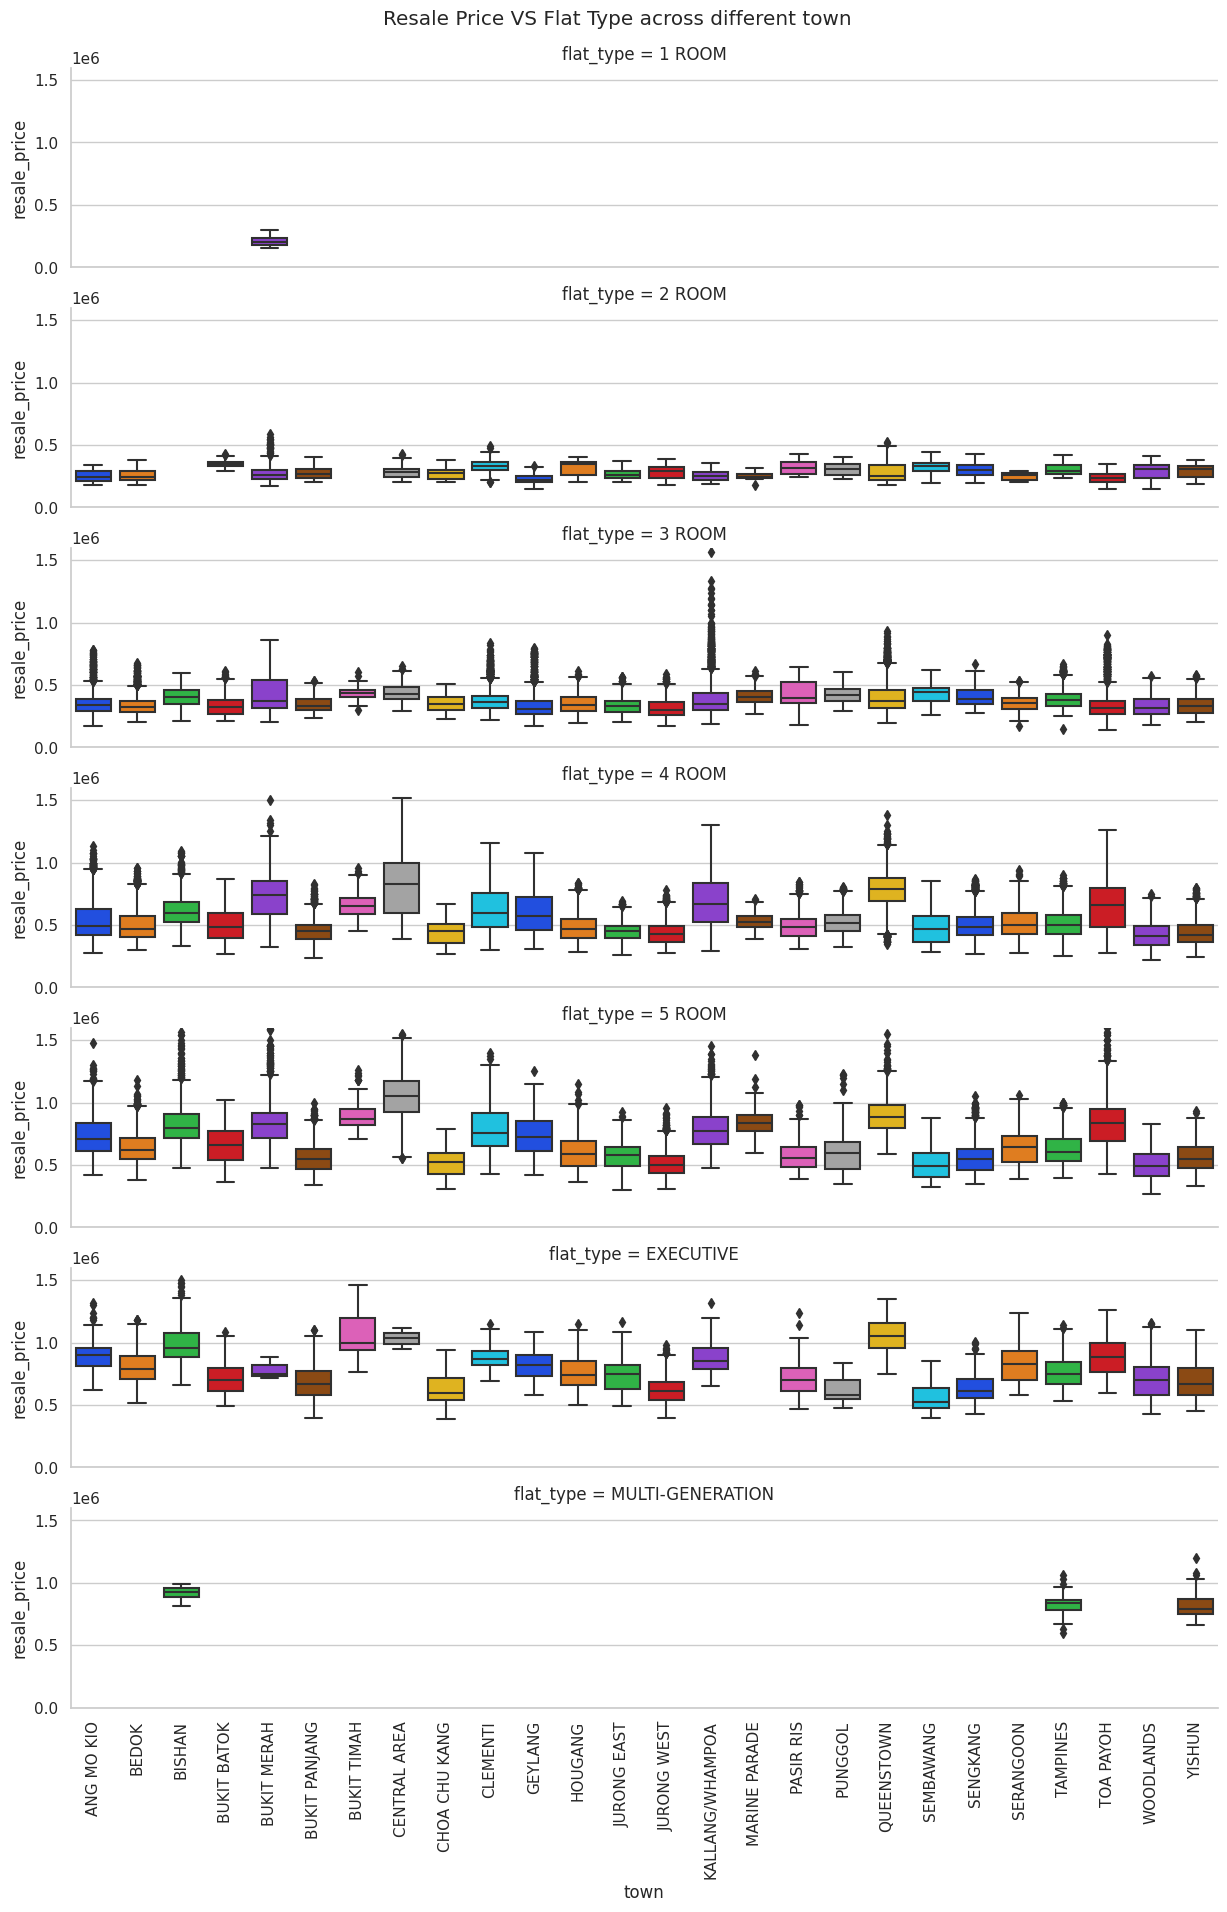

In [42]:
plt.clf()
plot_box()
plt.show()

In [43]:
def plot_bar():
    sns.set_style("whitegrid")
    sns.set_palette("bright")
    hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.catplot(data=df, x="resale_price", y="town", hue="flat_type", hue_order=hue_order, kind="bar",height=15, aspect=0.7, ci=None, palette="bright")
    g.fig.suptitle("Mean Resale Price VS Flat Type across different town", y=1.01)  
    g.set(xlim=(0, 1_200_000))

<Figure size 640x480 with 0 Axes>

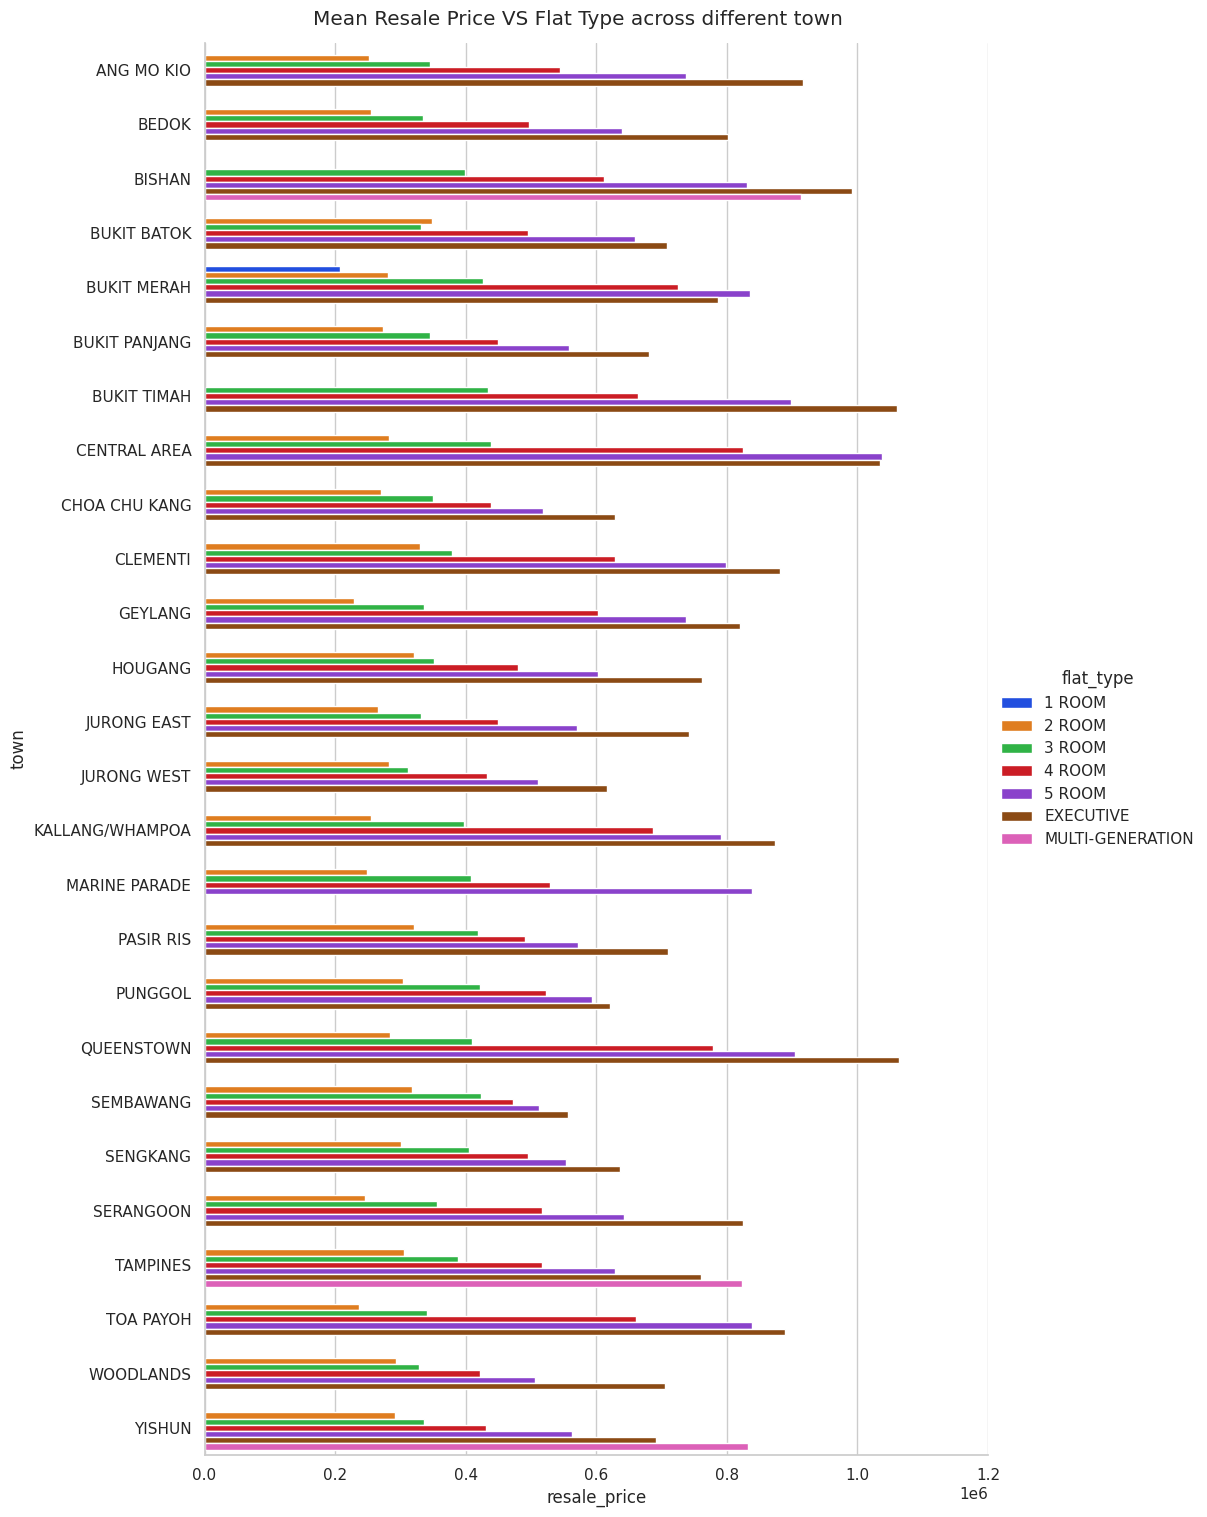

In [44]:
plt.clf()
plot_bar()
plt.show()

In [45]:
def plot_dist():
    sns.set_style("whitegrid")
    sns.set_palette("bright")
    hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.displot(data=df, x="resale_price", hue="flat_type", hue_order=hue_order, col="town", col_wrap=3, kind="kde", palette="bright")
    g.fig.suptitle("Kde of resale price across different flat Type and town", y=1.01)       
    g.set(xlim=(0, 1_600_000))

<Figure size 640x480 with 0 Axes>

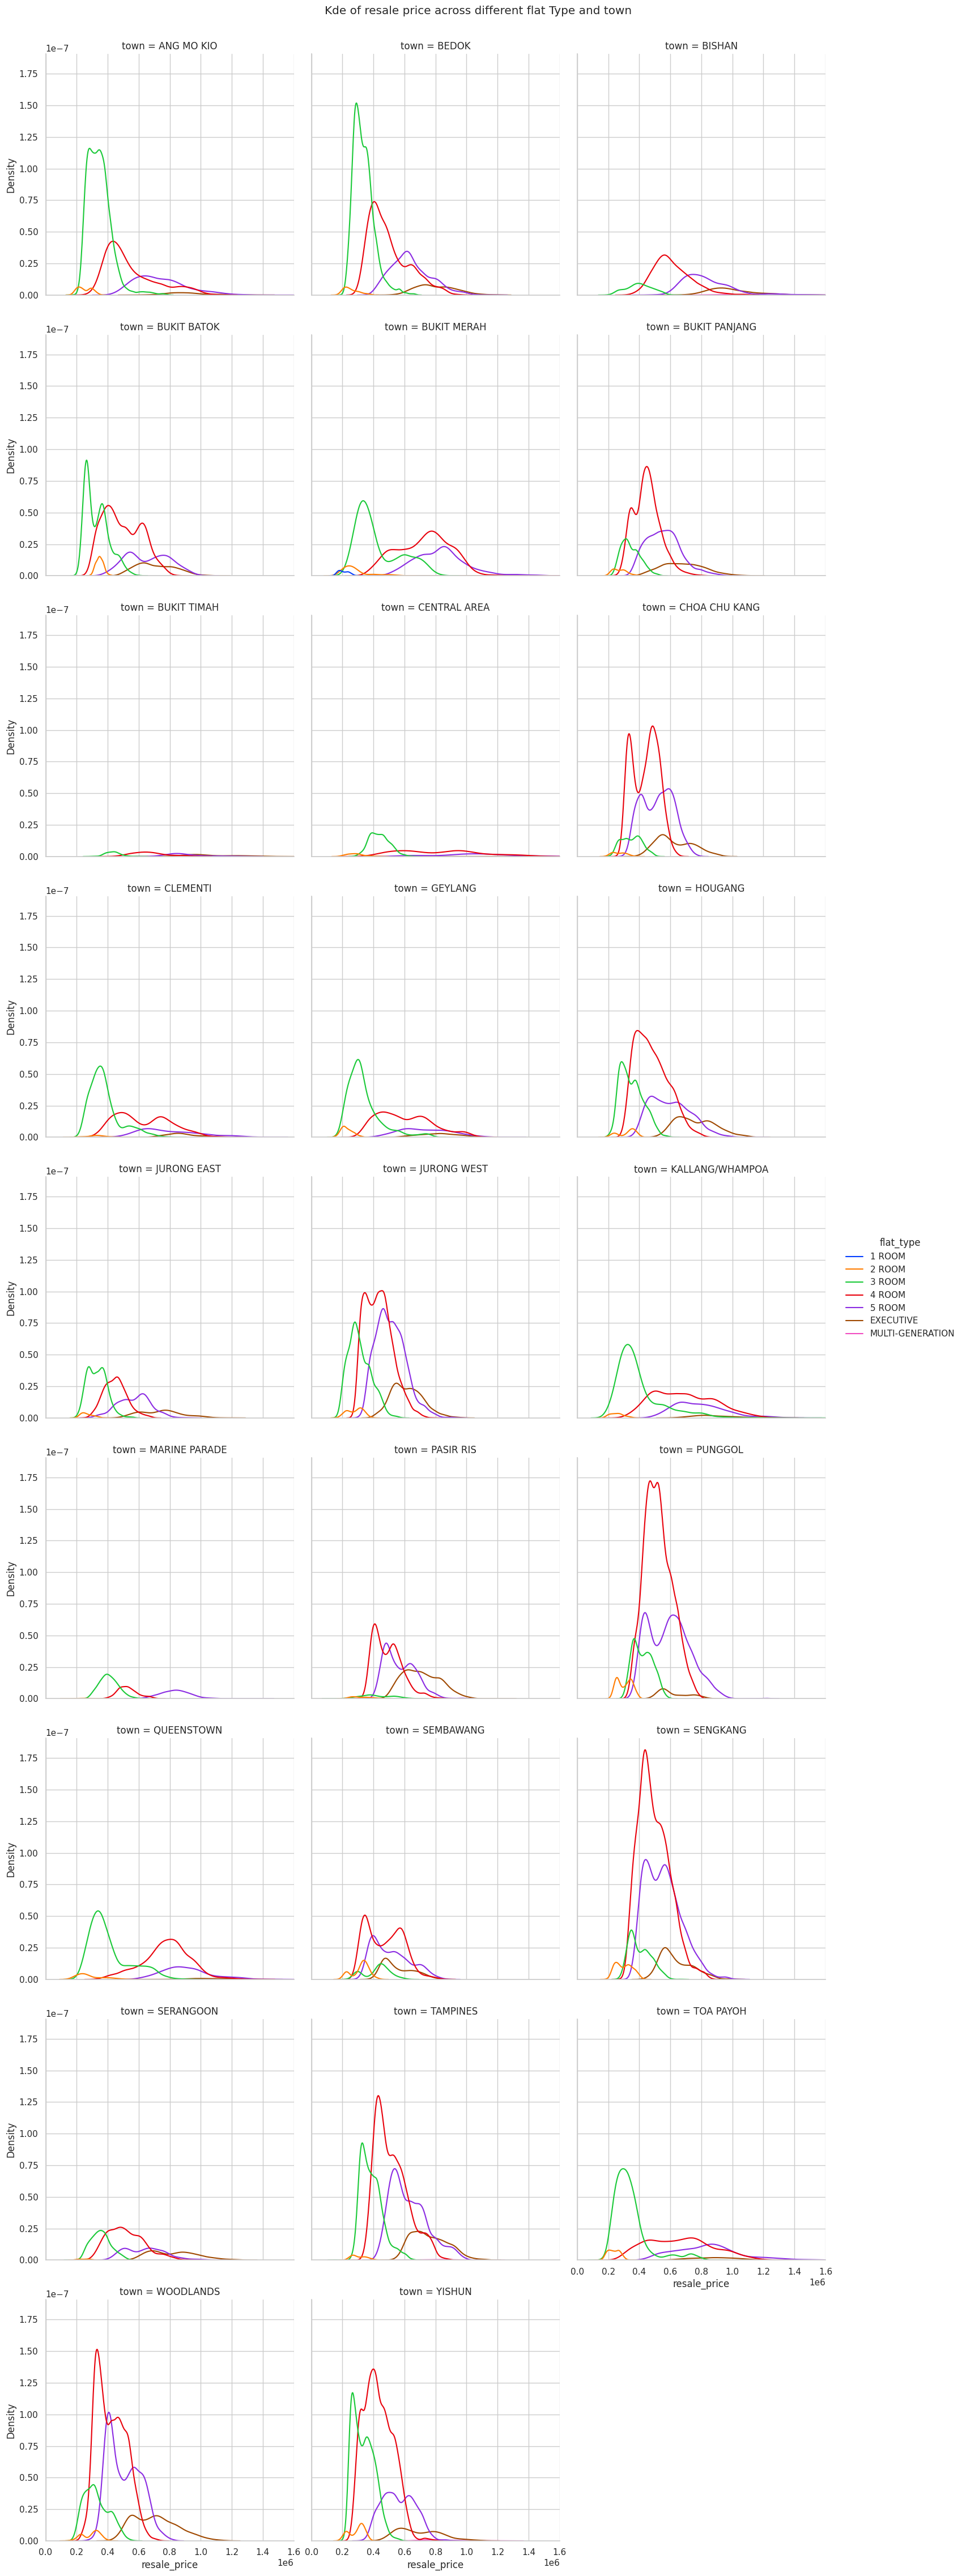

In [46]:
plt.clf()
plot_dist()
plt.show()

In [47]:
df.query("flat_type == '4 ROOM' & town == 'WOODLANDS' & floor_area_sqm > 100")

month  year_of_sales  month_of_sales       town flat_type block  \
1042   2017-01-01           2017               1  WOODLANDS    4 ROOM   217   
1045   2017-01-01           2017               1  WOODLANDS    4 ROOM   742   
1047   2017-01-01           2017               1  WOODLANDS    4 ROOM   702   
1048   2017-01-01           2017               1  WOODLANDS    4 ROOM   421   
1049   2017-01-01           2017               1  WOODLANDS    4 ROOM   317   
...           ...            ...             ...        ...       ...   ...   
202380 2025-02-01           2025               2  WOODLANDS    4 ROOM   824   
202381 2025-01-01           2025               1  WOODLANDS    4 ROOM   875   
202383 2025-03-01           2025               3  WOODLANDS    4 ROOM   875   
202385 2025-01-01           2025               1  WOODLANDS    4 ROOM   860   
202386 2025-02-01           2025               2  WOODLANDS    4 ROOM   853   

             street_name storey_range  floor_area_sqm flat_model  \
1042      MARSILING CRES     07 TO 09             104    Model A   
1045    WOODLANDS CIRCLE     01 TO 03             102    Model A   
1047     WOODLANDS DR 40     04 TO 06             102    Model A   
1048     WOODLANDS ST 41     13 TO 15             106    Model A   
1049     WOODLANDS ST 31     01 TO 03             103    Model A   
...                  ...          ...             ...        ...   
202380   WOODLANDS ST 81     04 TO 06             103    Model A   
202381   WOODLANDS ST 82     07 TO 09             115    Model A   
202383   WOODLANDS ST 82     07 TO 09             111    Model A   
202385   WOODLANDS ST 83     07 TO 09             106    Model A   
202386   WOODLANDS ST 83     01 TO 03             104    Model A   

        lease_commence_date     remaining_lease  resale_price  
1042                   1982  64 years 09 months      330000.0  
1045                   1997  79 years 08 months      333000.0  
1047                   1996            79 years      335000.0  
1048                   1996   78 years 01 month      335000.0  
1049                   1993  75 years 03 months      335000.0  
...                     ...                 ...           ...  
202380                 1989  63 years 09 months      555000.0  
202381                 1996  70 years 04 months      560000.0  
202383                 1996   70 years 01 month      560000.0  
202385                 1996  70 years 04 months      545000.0  
202386                 1993  67 years 07 months      530000.0  

[2242 rows x 13 columns]

In [48]:
def plot_point():
    sns.set_style("ticks")
    sns.set_palette("bright")
    hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.catplot(data=df, x="month_of_sales", y="resale_price", row="town", 
                    hue="flat_type", hue_order=hue_order, kind="point", 
                    height=3.7, aspect=5, palette="bright", ci=None)
    g.fig.suptitle("Resale Price VS Mth of Sales across different town and flat type", y=1.01)   
    g.set(ylim=(0, 1_600_000), xlabel="Month of Sales", ylabel = "Resale Price (mil)")
    #plt.xticks(rotation=0)
    #plt.ticklabel_format(style='scientific', axis='y')
   

<Figure size 640x480 with 0 Axes>

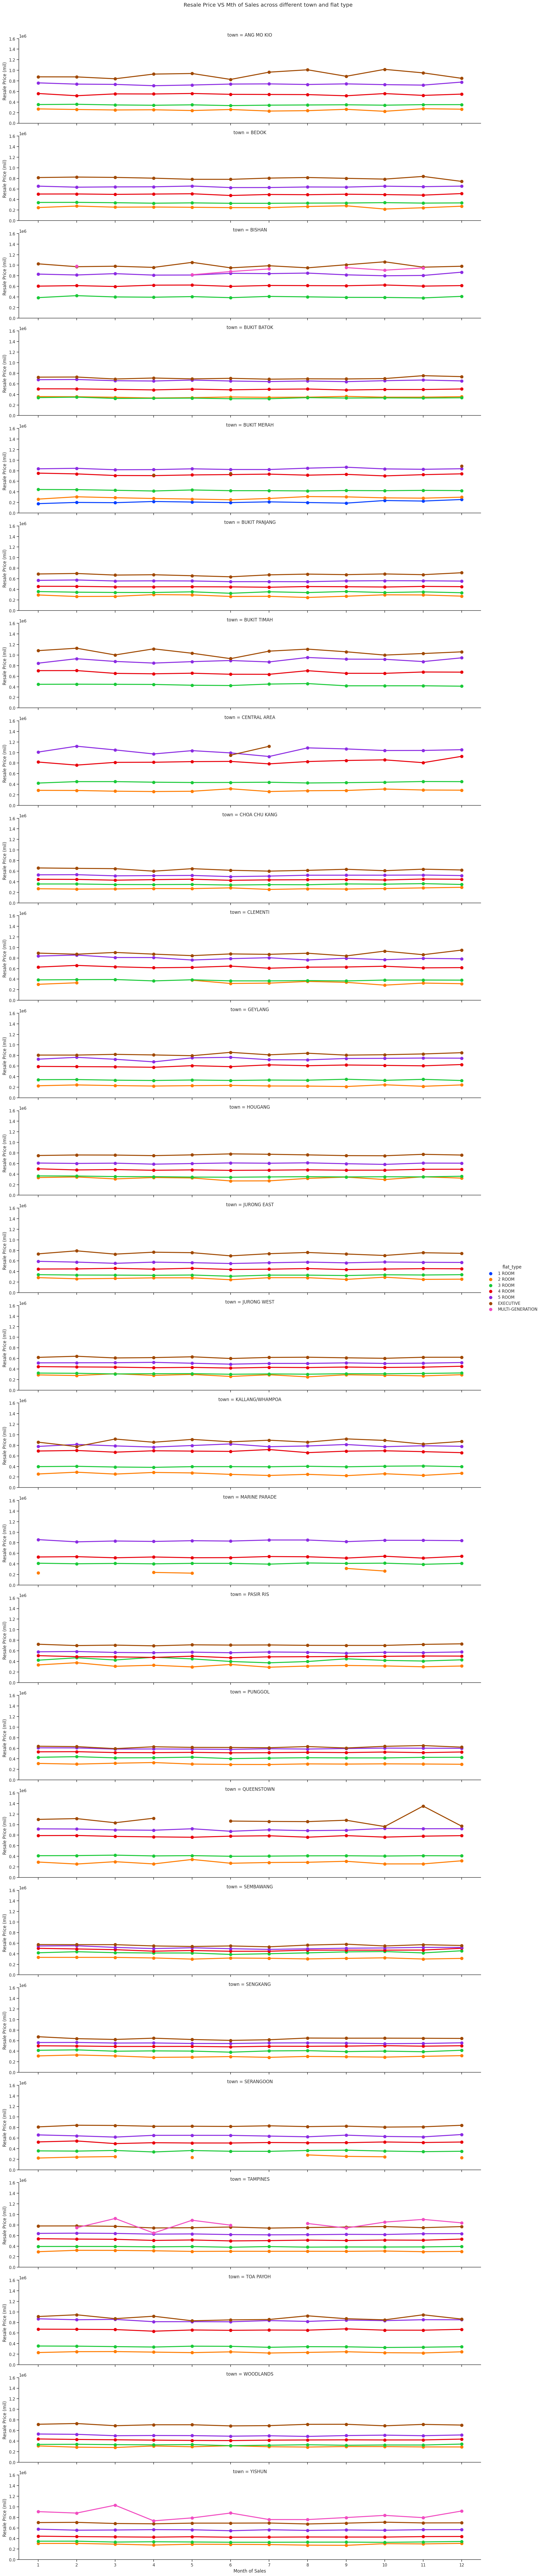

In [49]:
plt.clf()
plot_point()
plt.show()

In [50]:
def plot_count():
    sns.set_style("ticks")
    sns.set_palette("bright")
    hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.catplot(data=df, x="month_of_sales", row="town", 
                    hue="flat_type", hue_order=hue_order, kind="count", 
                    height=3.7, aspect=5, palette="bright", ci=None)
    g.fig.suptitle("Number of Sales VS Mth of Sales across different town and flat type", y=1.01)   
    #g.set(ylim=(0, 1_600_000))
    plt.xticks(rotation=0)

<Figure size 640x480 with 0 Axes>

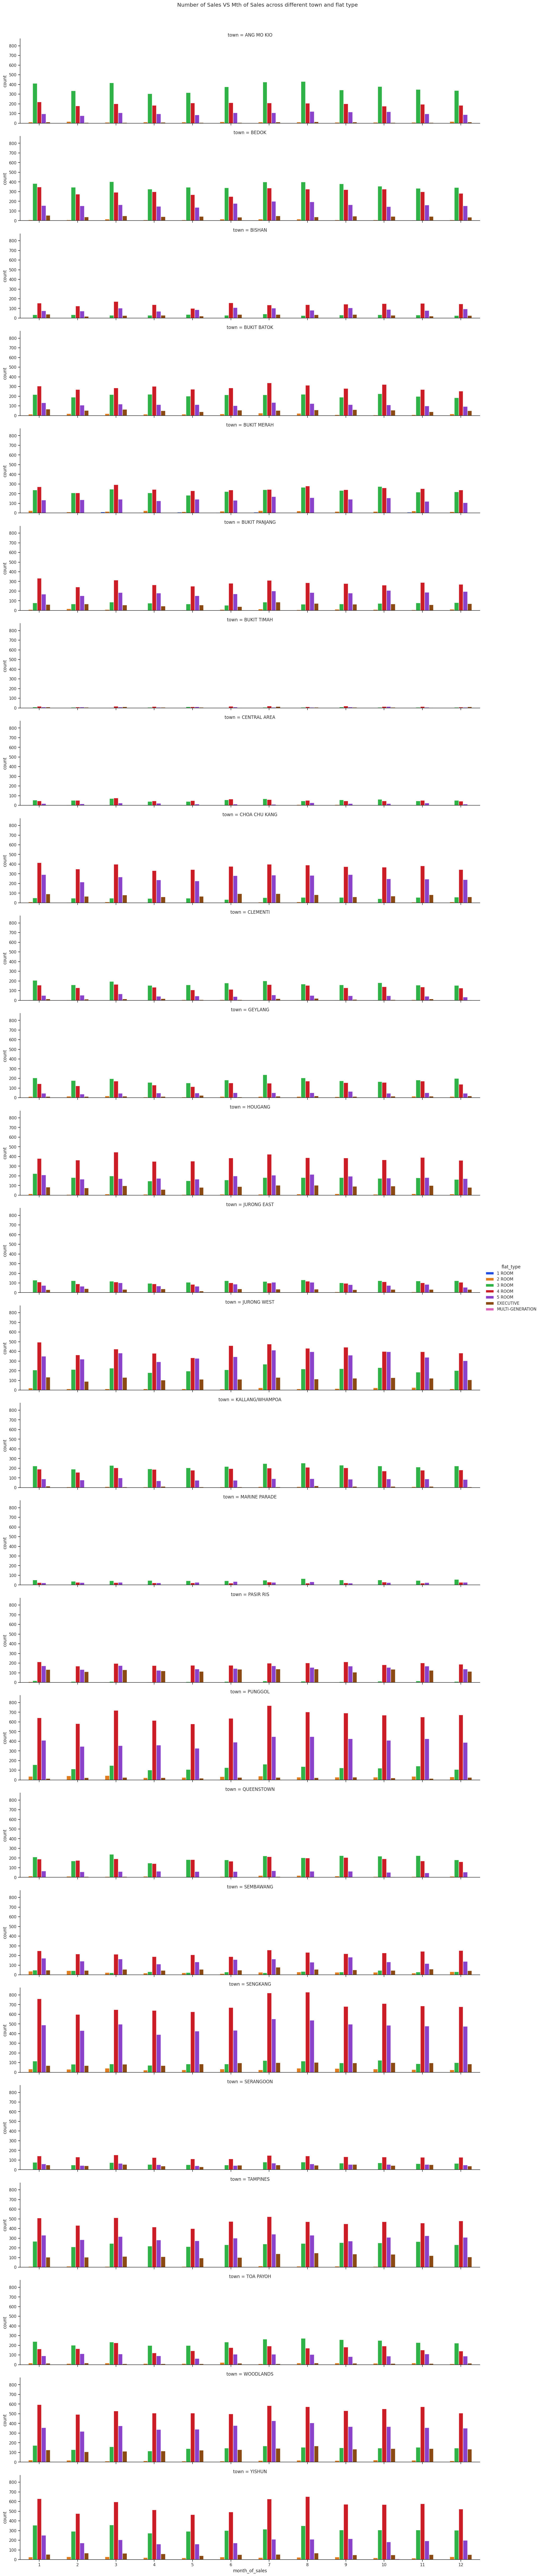

In [51]:
plt.clf()
plot_count()
plt.show()

In [52]:
df.head()

month  year_of_sales  month_of_sales        town flat_type block  \
0 2017-01-01           2017               1  ANG MO KIO    2 ROOM   406   
1 2017-01-01           2017               1  ANG MO KIO    3 ROOM   108   
2 2017-01-01           2017               1  ANG MO KIO    3 ROOM   602   
3 2017-01-01           2017               1  ANG MO KIO    3 ROOM   465   
4 2017-01-01           2017               1  ANG MO KIO    3 ROOM   601   

         street_name storey_range  floor_area_sqm      flat_model  \
0  ANG MO KIO AVE 10     10 TO 12              44        Improved   
1   ANG MO KIO AVE 4     01 TO 03              67  New Generation   
2   ANG MO KIO AVE 5     01 TO 03              67  New Generation   
3  ANG MO KIO AVE 10     04 TO 06              68  New Generation   
4   ANG MO KIO AVE 5     01 TO 03              67  New Generation   

   lease_commence_date     remaining_lease  resale_price  
0                 1979  61 years 04 months      232000.0  
1                 1978  60 years 07 months      250000.0  
2                 1980  62 years 05 months      262000.0  
3                 1980   62 years 01 month      265000.0  
4                 1980  62 years 05 months      265000.0

In [53]:
def plot_price():
    sns.set_style("ticks")
    sns.set_palette("bright")
    hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.relplot(data=df, x="month", y="resale_price", row="town", 
                    hue="flat_type", hue_order=hue_order, kind="line", 
                    height=3.7, aspect=5, palette="bright", ci=None)
    g.fig.suptitle("Resale Price across different town and flat type", y=1.01)   
    g.set(ylim=(0, 1_600_000), xlabel="Month of Sales", ylabel = "Resale Price (mil)")
   
    #g.set_ylabel("Month of Sales", fontsize=14)
    #plt.xticks(rotation=0)
    #plt.ticklabel_format(style='scientific', axis='y')
   

<Figure size 640x480 with 0 Axes>

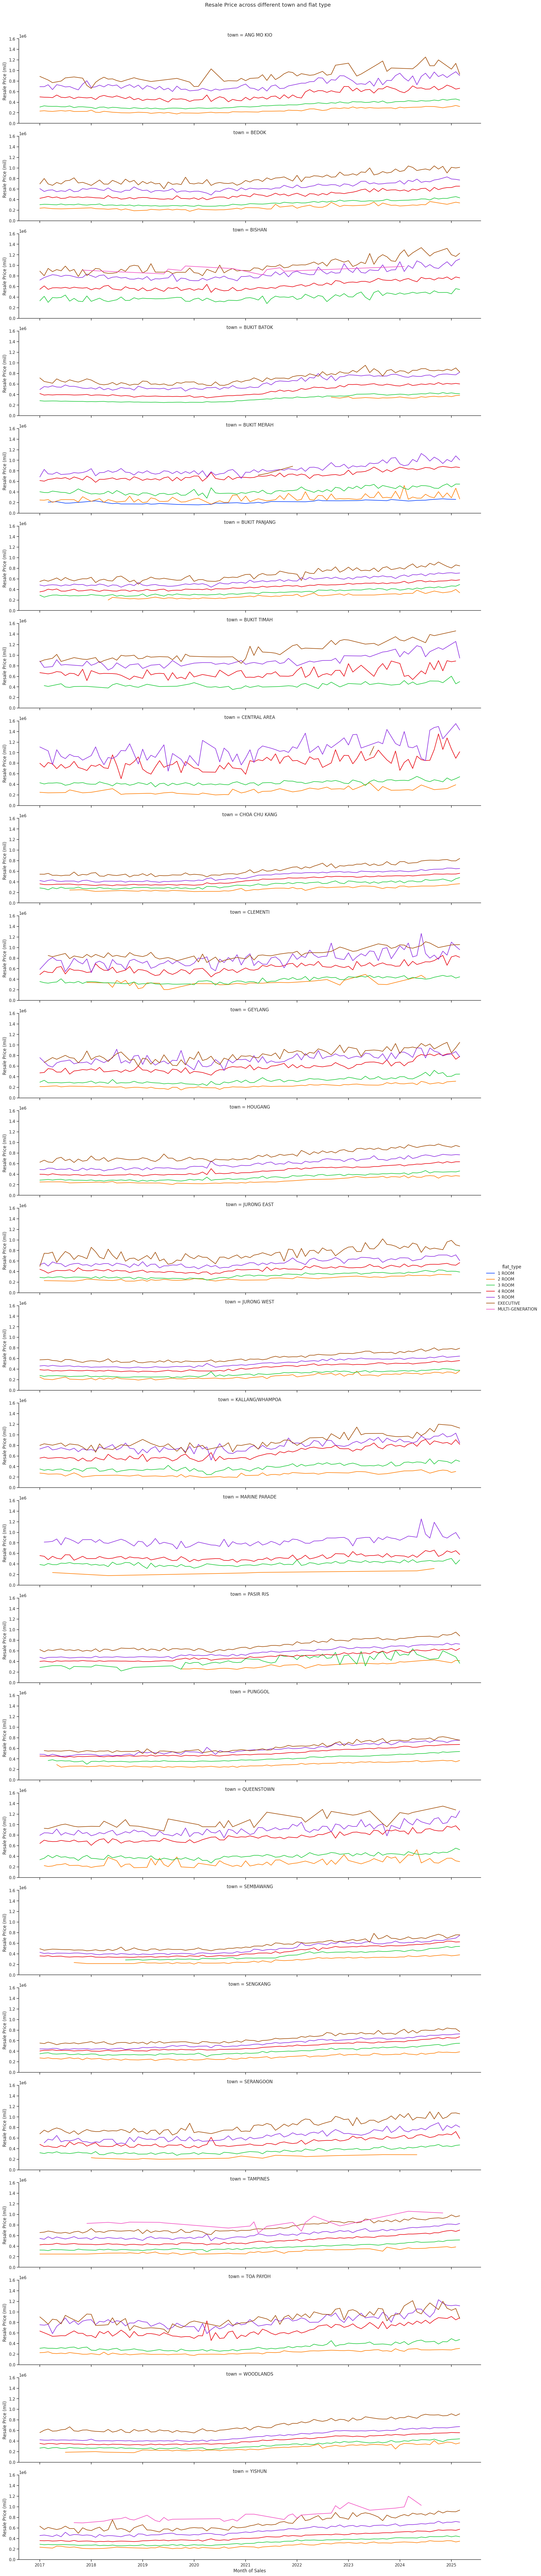

In [54]:
plt.clf()
plot_price()
plt.show()